In [1]:
#Importing dependencies 
import pandas as pd
import os 
import pprint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing csv from Resources 
path = 'Resources/VISTA_cleaned.csv'
Vista = pd.read_csv(path)

In [3]:
Vista

,Trip_ID,Person_ID,Year,Total_Stops,Trip_Count,Start_Time,Arrival_Time,Trip_Time,Travel_Time,Wait_Time,...,Mode_5,Mode_6,Mode_7,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7
0,Y12H0000102P03T01,Y12H0000102P03,2012,3,1,510,580,70,54,16,...,0,0,0,10,34.0,10.0,0.0,0.0,0.0,0.0
1,Y12H0000102P03T02,Y12H0000102P03,2012,3,2,1050,1120,70,56,14,...,0,0,0,10,36.0,10.0,0.0,0.0,0.0,0.0
2,Y12H0000103P03T02,Y12H0000103P03,2012,3,2,920,950,30,28,2,...,0,0,0,5,8.0,15.0,0.0,0.0,0.0,0.0
3,Y12H0000103P04T02,Y12H0000103P04,2012,3,2,920,950,30,28,2,...,0,0,0,5,8.0,15.0,0.0,0.0,0.0,0.0
4,Y12H0000303P01T01,Y12H0000303P01,2012,3,1,430,460,30,30,0,...,0,0,0,10,15.0,5.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,Y20H3990403P02T02,Y20H3990403P02,2020,4,2,490,530,40,38,2,...,0,0,0,2,11.0,20.0,5.0,0.0,0.0,0.0
8754,Y20H3990403P02T05,Y20H3990403P02,2020,3,5,1020,1065,45,40,5,...,0,0,0,5,25.0,10.0,0.0,0.0,0.0,0.0
8755,Y20H3991041P01T01,Y20H3991041P01,2020,3,1,450,580,130,130,0,...,0,0,0,15,105.0,10.0,0.0,0.0,0.0,0.0
8756,Y20H3991041P01T02,Y20H3991041P01,2020,3,2,625,735,110,95,15,...,0,0,0,10,70.0,15.0,0.0,0.0,0.0,0.0


In [4]:
#Checking rows counts
print(f"There are {len(Vista)} rows in the dataset")

There are 8758 rows in the dataset


In [5]:
#Checking columns in dataset
Vista.columns

Index(['Trip_ID', 'Person_ID', 'Year', 'Total_Stops', 'Trip_Count',
       'Start_Time', 'Arrival_Time', 'Trip_Time', 'Travel_Time', 'Wait_Time',
       'Duration', 'Total_Distance', 'Original_Place_1', 'Original_Place_2',
       'Original_Purpose_1', 'Original_Purpose_2', 'Destination_1',
       'Destination_2', 'Dest_Purpose_1', 'Dest_Purpose_2', 'Starting_LGA',
       'Ending_LGA', 'Trip_Purpose', 'Link_Mode', 'Dist_1', 'Dist_2', 'Dist_3',
       'Dist_4', 'Dist_5', 'Dist_6', 'Dist_7', 'Mode_1', 'Mode_2', 'Mode_3',
       'Mode_4', 'Mode_5', 'Mode_6', 'Mode_7', 'Time_1', 'Time_2', 'Time_3',
       'Time_4', 'Time_5', 'Time_6', 'Time_7'],
      dtype='object')

## Grouping the data by starting and ending LGA

In [6]:
#Grouping by starting LGA and counting the rows in each group
Start_LGA_df = Vista.groupby(by='Starting_LGA').count().reset_index(drop=False)

In [7]:
#Removing uncessary columns
Start_LGA_df = Start_LGA_df[['Starting_LGA','Trip_ID']]
#Renaming the column for merge later
Start_LGA_df = Start_LGA_df.rename(columns = {'Starting_LGA':'LGA','Trip_ID':'Starting LGA count'})

In [8]:
#Grouping by ending LGA 
Ending_LGA_df = Vista.groupby(by='Ending_LGA').count().reset_index(drop=False)

In [9]:
#Removing uncessary columns
Ending_LGA_df = Ending_LGA_df[['Ending_LGA','Trip_ID']]
#Renaming the column for merge later
Ending_LGA_df = Ending_LGA_df.rename(columns = {'Ending_LGA':'LGA','Trip_ID':'Ending LGA count'})

In [10]:
#Merge the LGA counts dataframes
LGA_count = pd.merge(Start_LGA_df,Ending_LGA_df,on='LGA')

In [11]:
#Sort by increasing starting LGA count
LGA_count = LGA_count.sort_values('Starting LGA count')

In [12]:
#Changing values to log 
LGA_count['Start Log Value'] = np.log2(LGA_count['Starting LGA count'])
LGA_count['End Log Value'] = np.log2(LGA_count['Ending LGA count'])

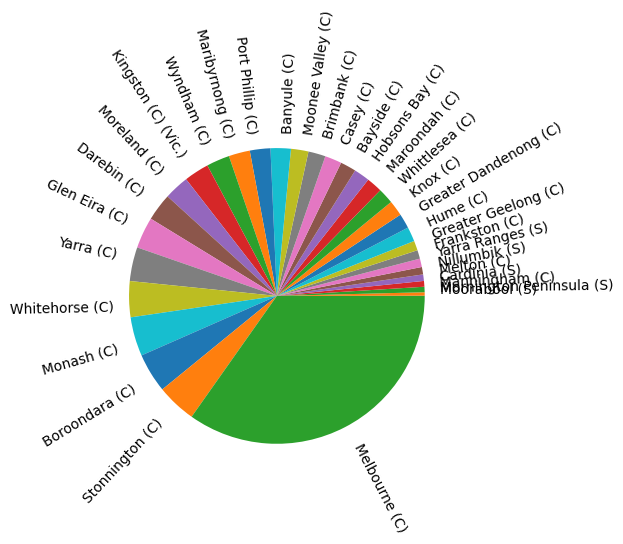

In [13]:
#Create pie chart for melbourne compared to others
labels = LGA_count['LGA'].unique()

sizes = LGA_count['Starting LGA count']

fig, ax = plt.subplots()
ax.pie(sizes,labels=labels,rotatelabels=True)

plt.show()

In [14]:
LGA_count.head()

,LGA,Starting LGA count,Ending LGA count,Start Log Value,End Log Value
22,Moorabool (S),2,2,1.000000,1.000000
24,Mornington Peninsula (S),33,29,5.044394,4.857981
15,Manningham (C),52,46,5.700440,5.523562
4,Cardinia (S),55,58,5.781360,5.857981
19,Melton (C),62,61,5.954196,5.930737


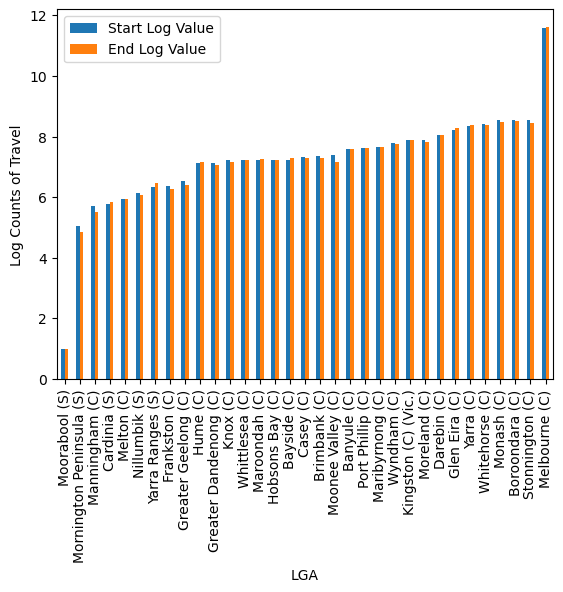

In [15]:
LGA_count.plot(kind='bar',x = 'LGA',y=['Start Log Value','End Log Value'],ylabel='Log Counts of Travel')
plt.tight_layout
plt.show()

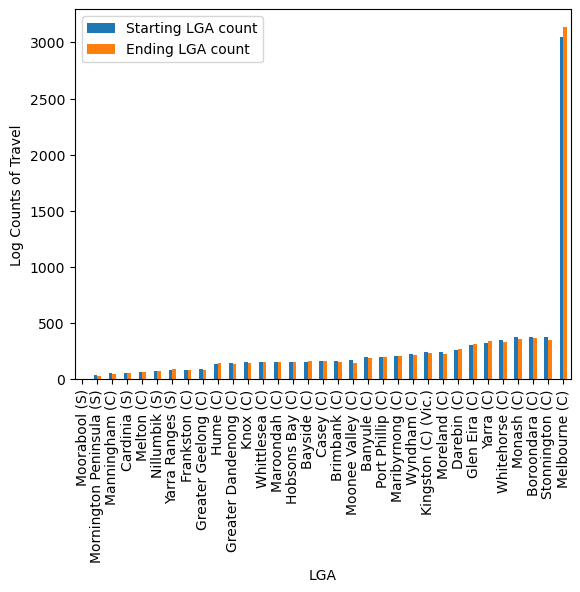

In [78]:
LGA_count.plot(kind='bar',x = 'LGA',y=['Starting LGA count','Ending LGA count'],ylabel='Log Counts of Travel')
plt.tight_layout
plt.show()

## Grouping by purpose of travel

In [16]:
purpose_travel = Vista.groupby(by = 'Trip_Purpose').count()

In [17]:
purpose_travel_df = purpose_travel.reset_index(drop=False)[['Trip_Purpose','Trip_ID']]

In [18]:
purpose_travel_df = purpose_travel_df.sort_values(by='Trip_ID')

In [19]:
purpose_travel_df

,Trip_Purpose,Trip_ID
11,Unknown Purpose,1
4,Not Stated,2
7,Pick-up or Deliver Something,28
5,Other Purpose,29
0,Accompany Someone,55
9,Recreational,88
8,Pick-up or Drop-off Someone,125
6,Personal Business,203
1,Buy Something,368
3,Education,631


<Axes: xlabel='Trip Purpose', ylabel='Counts of Travel'>

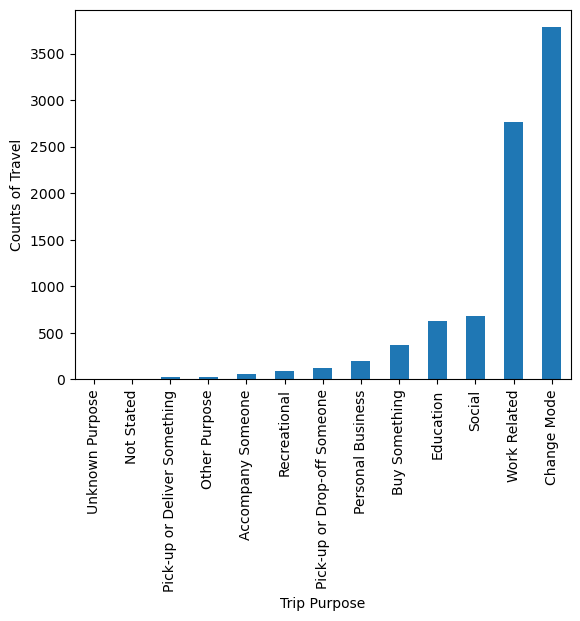

In [20]:
purpose_travel_df.plot(kind='bar',x='Trip_Purpose',xlabel = 'Trip Purpose',ylabel='Counts of Travel',legend=False)

##

In [39]:
# Data only from 2018-2022 Check data from those years. 
year_df = Vista.groupby(by=['Year','Trip_Purpose']).count()


In [28]:
year_df = year_df.drop(index='Change Mode',level=1)
year_df = year_df.drop(index='Other Purpose',level=1)
year_df = year_df.drop(index='Not Stated',level=1)
year_df = year_df.drop(index='Unknown Purpose',level=1)
year_df = year_df.reset_index()

In [29]:
year_df = year_df[['Year','Trip_Purpose','Trip_ID']]

In [30]:
year_df = year_df.loc[(year_df['Year']==2018)|(year_df['Year']==2019)|(year_df['Year']==2020)|
           (year_df['Year']==2021)|(year_df['Year']==2022)]

In [31]:
pivot_table = year_df.pivot_table(index="Trip_Purpose", columns="Year", values="Trip_ID")

In [32]:
pivot_table

Year,2018,2019,2020
Trip_Purpose,,,
Accompany Someone,14.0,5.0,1.0
Buy Something,55.0,51.0,4.0
Education,102.0,72.0,11.0
Personal Business,25.0,23.0,4.0
Pick-up or Deliver Something,3.0,5.0,NaN
Pick-up or Drop-off Someone,22.0,14.0,1.0
Recreational,13.0,8.0,3.0
Social,112.0,70.0,17.0
Work Related,407.0,314.0,63.0


array([<Axes: title={'center': '2018'}, xlabel='Trip_Purpose'>,
       <Axes: title={'center': '2019'}, xlabel='Trip_Purpose'>,
       <Axes: title={'center': '2020'}, xlabel='Trip_Purpose'>],
      dtype=object)

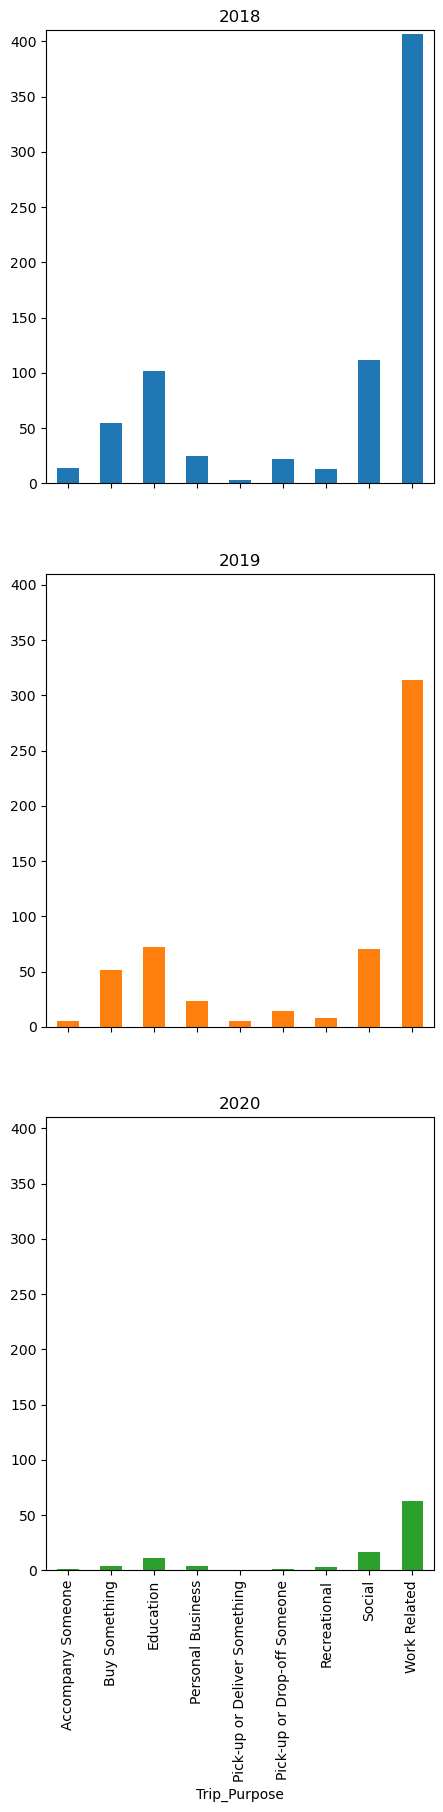

In [38]:
pivot_table.plot(kind='bar',subplots=True,legend=False,ylim=(0,410),figsize=(5,20))

In [40]:
Vista

,Trip_ID,Person_ID,Year,Total_Stops,Trip_Count,Start_Time,Arrival_Time,Trip_Time,Travel_Time,Wait_Time,...,Mode_5,Mode_6,Mode_7,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7
0,Y12H0000102P03T01,Y12H0000102P03,2012,3,1,510,580,70,54,16,...,0,0,0,10,34.0,10.0,0.0,0.0,0.0,0.0
1,Y12H0000102P03T02,Y12H0000102P03,2012,3,2,1050,1120,70,56,14,...,0,0,0,10,36.0,10.0,0.0,0.0,0.0,0.0
2,Y12H0000103P03T02,Y12H0000103P03,2012,3,2,920,950,30,28,2,...,0,0,0,5,8.0,15.0,0.0,0.0,0.0,0.0
3,Y12H0000103P04T02,Y12H0000103P04,2012,3,2,920,950,30,28,2,...,0,0,0,5,8.0,15.0,0.0,0.0,0.0,0.0
4,Y12H0000303P01T01,Y12H0000303P01,2012,3,1,430,460,30,30,0,...,0,0,0,10,15.0,5.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,Y20H3990403P02T02,Y20H3990403P02,2020,4,2,490,530,40,38,2,...,0,0,0,2,11.0,20.0,5.0,0.0,0.0,0.0
8754,Y20H3990403P02T05,Y20H3990403P02,2020,3,5,1020,1065,45,40,5,...,0,0,0,5,25.0,10.0,0.0,0.0,0.0,0.0
8755,Y20H3991041P01T01,Y20H3991041P01,2020,3,1,450,580,130,130,0,...,0,0,0,15,105.0,10.0,0.0,0.0,0.0,0.0
8756,Y20H3991041P01T02,Y20H3991041P01,2020,3,2,625,735,110,95,15,...,0,0,0,10,70.0,15.0,0.0,0.0,0.0,0.0


In [68]:
Mode_df.count().columns

Index(['Trip_ID', 'Person_ID', 'Year', 'Total_Stops', 'Trip_Count',
       'Start_Time', 'Arrival_Time', 'Trip_Time', 'Travel_Time', 'Wait_Time',
       'Duration', 'Total_Distance', 'Original_Place_1', 'Original_Place_2',
       'Original_Purpose_1', 'Original_Purpose_2', 'Destination_1',
       'Destination_2', 'Dest_Purpose_1', 'Dest_Purpose_2', 'Starting_LGA',
       'Ending_LGA', 'Trip_Purpose', 'Link_Mode', 'Dist_1', 'Dist_2', 'Dist_3',
       'Dist_4', 'Dist_5', 'Dist_6', 'Dist_7', 'Mode_1', 'Mode_3', 'Mode_4',
       'Mode_5', 'Mode_6', 'Mode_7', 'Time_1', 'Time_2', 'Time_3', 'Time_4',
       'Time_5', 'Time_6', 'Time_7'],
      dtype='object')

In [75]:
#Mode of transport
Mode_df = Vista.groupby(by=['Mode_1','Starting_LGA'])
Mode_df.count()[['Trip_ID','Dest_Purpose_1','Dest_Purpose_2','Ending_LGA','Link_Mode']]

Trip_ID  Dest_Purpose_1  Dest_Purpose_2  Ending_LGA  \
Mode_1  Starting_LGA                                                            
Bicycle Banyule (C)             5               5               5           5   
        Bayside (C)             4               4               4           4   
        Boroondara (C)          3               3               3           3   
        Brimbank (C)            1               1               1           1   
        Cardinia (S)            2               2               2           2   
...                           ...             ...             ...         ...   
Walking Whitehorse (C)        225             225             225         225   
        Whittlesea (C)         72              72              72          72   
        Wyndham (C)            76              76              76          76   
        Yarra (C)             311             311             311         311   
        Yarra Ranges (S)       29              29              29          29   

                          Link_Mode  
Mode_1  Starting_LGA                 
Bicycle Banyule (C)               5  
        Bayside (C)               4  
        Boroondara (C)            3  
        Brimbank (C)              1  
        Cardinia (S)              2  
...                             ...  
Walking Whitehorse (C)          225  
        Whittlesea (C)           72  
        Wyndham (C)              76  
        Yarra (C)               311  
        Yarra Ranges (S)         29  

[176 rows x 5 columns]